<Axes: xlabel='Date', ylabel='count'>

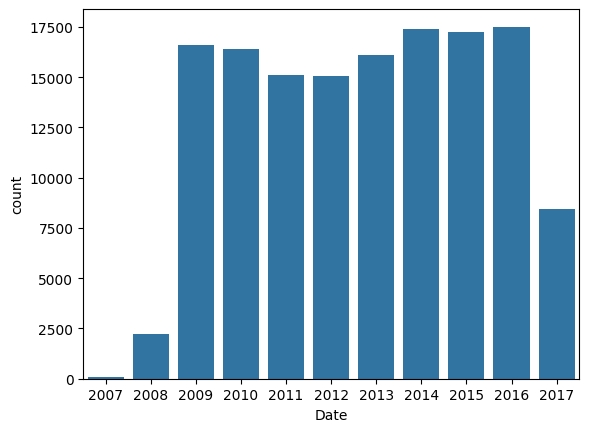

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
raw_df=pd.read_csv('weatherAUS.csv')
raw_df.dropna(subset =['RainTomorrow'],inplace=True)
raw_df
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [3]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]
test_df.shape

(25974, 23)

In [4]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_col=train_inputs.select_dtypes('object').columns.tolist()
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(raw_df[numerical_cols])
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])
test_inputs[numerical_cols].isna().sum()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(raw_df[numerical_cols])
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
raw_df2=raw_df[cat_col].fillna('Unknown')
encoder.fit(raw_df2)
encoded_col=list(encoder.get_feature_names_out(cat_col))
encoded_col
train_inputs[encoded_col] = encoder.transform(train_inputs[cat_col])
val_inputs[encoded_col] = encoder.transform(val_inputs[cat_col])
test_inputs[encoded_col] = encoder.transform(test_inputs[cat_col])

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_41988\2895409489.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_col] = encoder.transform(train_inputs[cat_col])
C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_41988\2895409489.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_col] = encoder.transform(train_inputs[cat_col])
C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_41988\2895409489.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [32]:
test_inputs
Y_train=train_inputs[numerical_cols+encoded_col]
Y_val=val_inputs[numerical_cols+encoded_col]
Y_test=test_inputs[numerical_cols+encoded_col]

In [33]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=42)
model.fit(Y_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [34]:
train_predict=model.predict(Y_train)
from sklearn.metrics import accuracy_score,confusion_matrix
train_predict
pd.value_counts(train_predict)
train_prob=model.predict_proba(Y_train)
train_prob
accuracy_score(train_targets, train_predict)


C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_41988\1476356388.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_predict)


0.9999797955307714

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

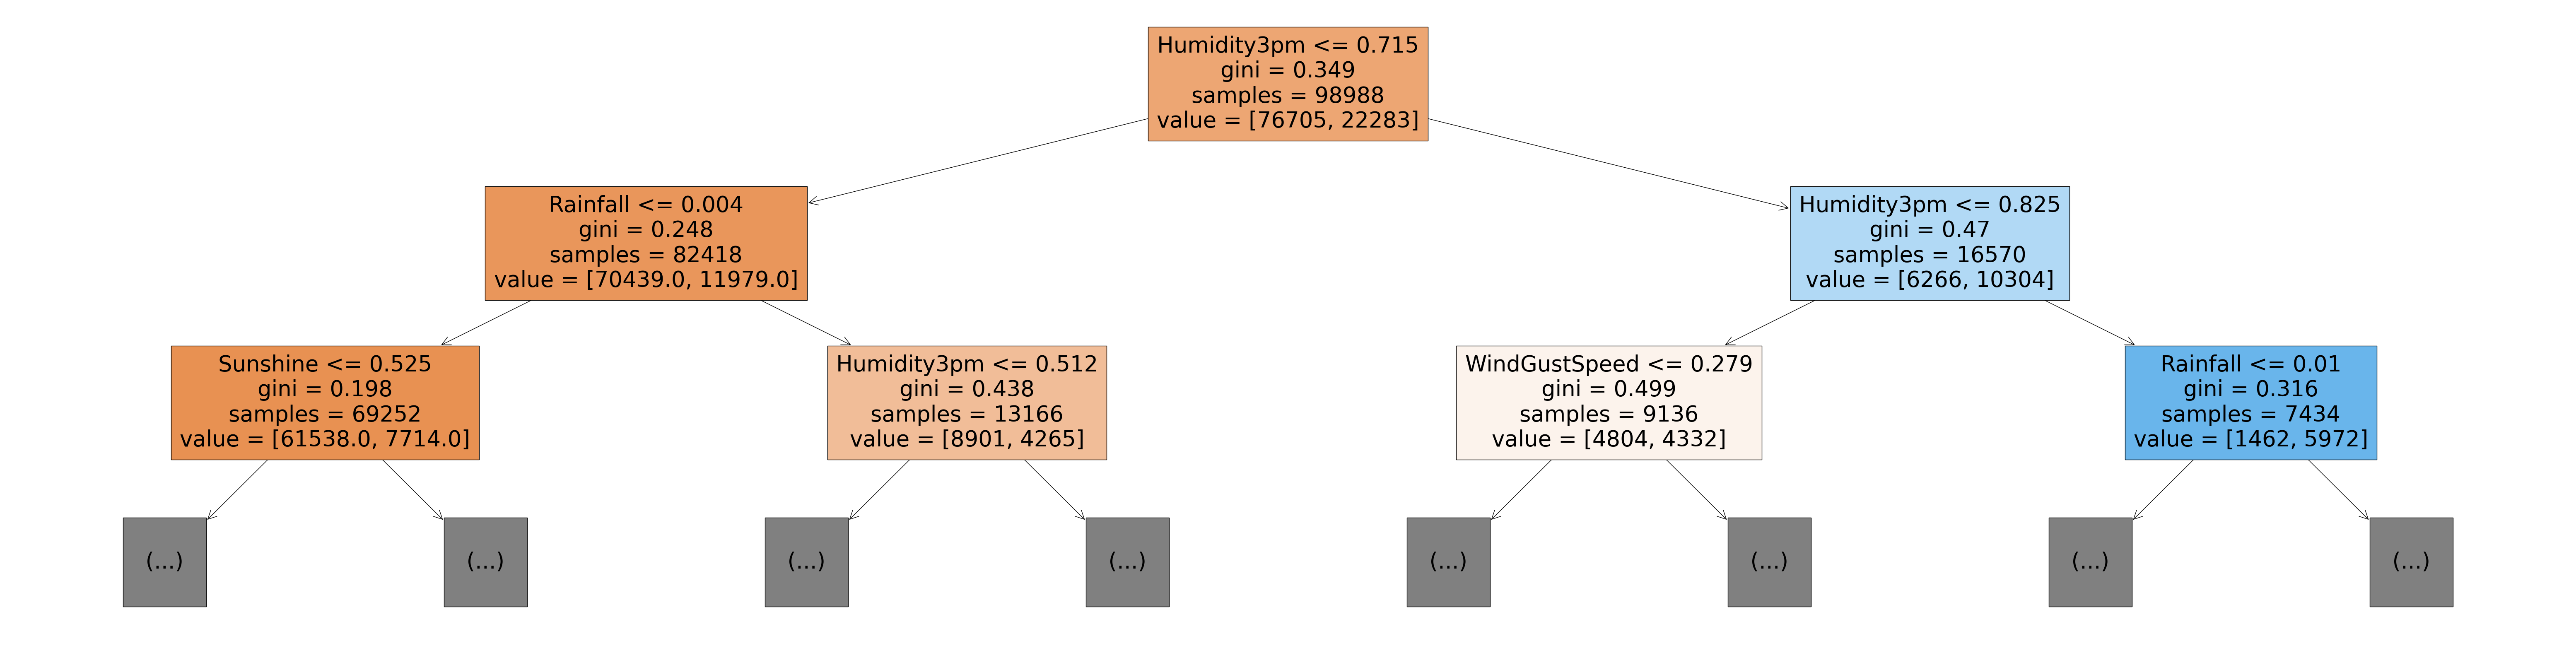

In [35]:
from sklearn.tree import plot_tree,export_text
import matplotlib.pyplot as plt
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=Y_train.columns,max_depth=2,filled=True)

<Axes: xlabel='importance', ylabel='feature'>

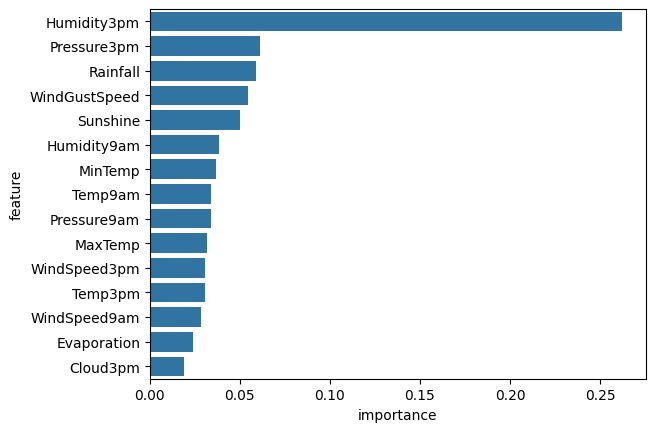

In [36]:
model.feature_importances_
important_df=pd.DataFrame({'feature': Y_train.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)
important_df.head(15)
sns.barplot(data=important_df.head(15),y='feature',x='importance')

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 43

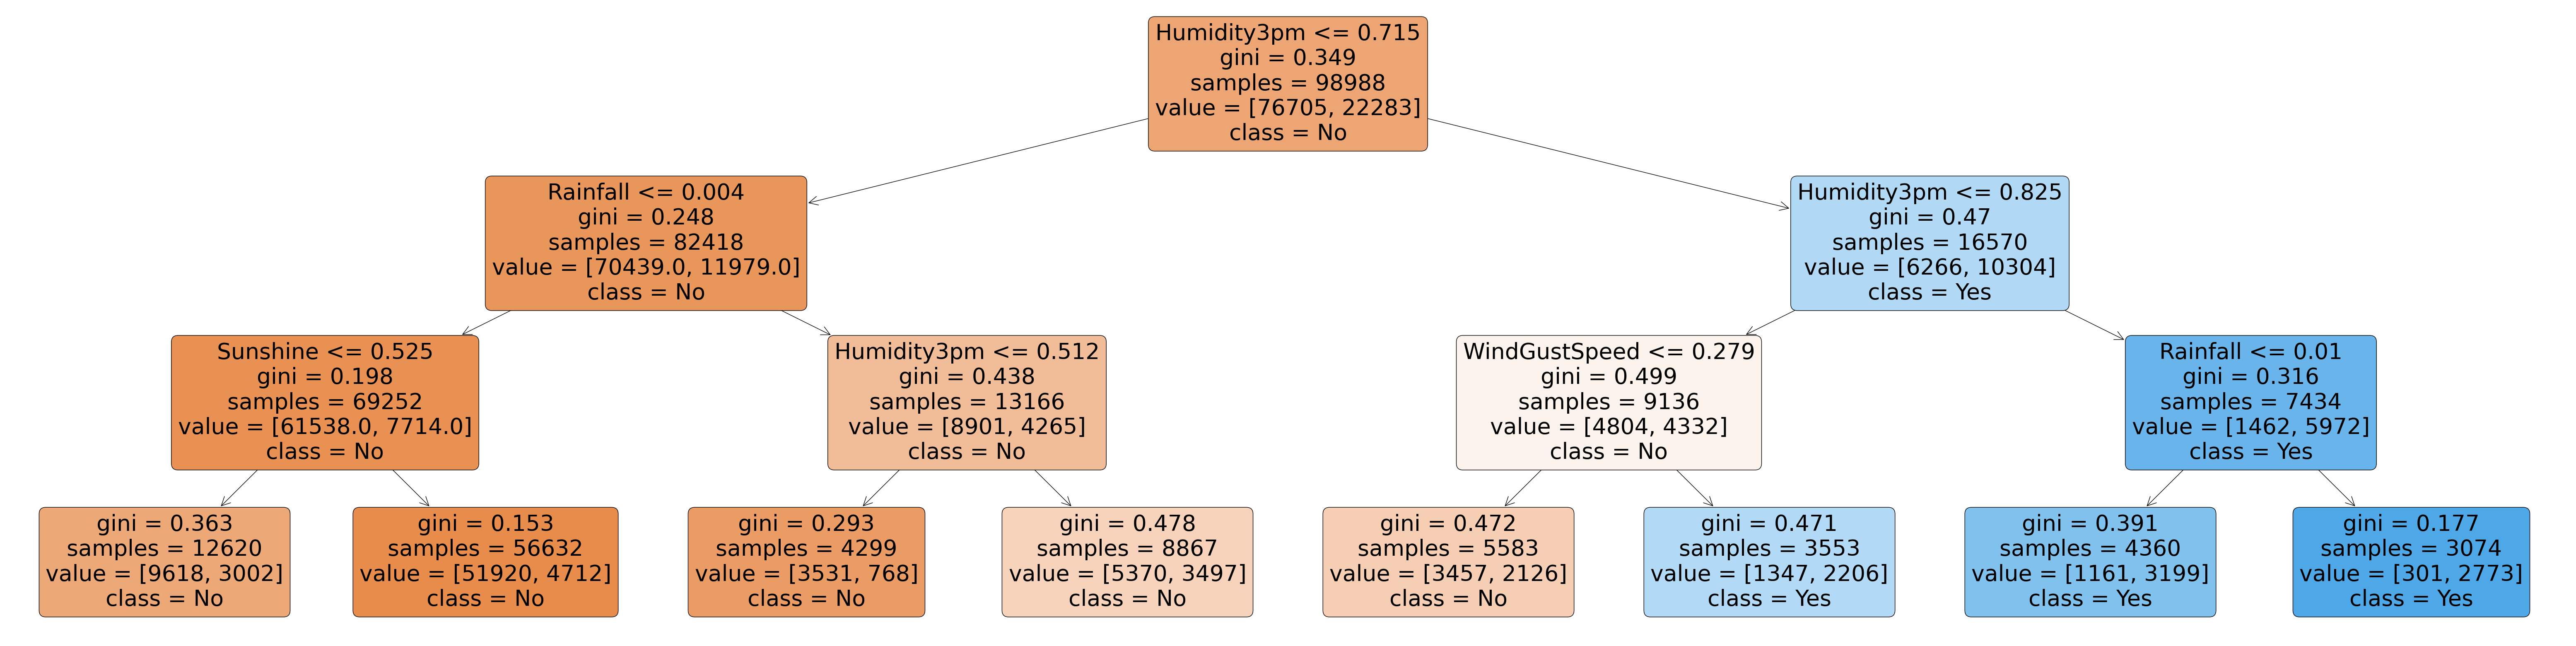

In [40]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(Y_train,train_targets)
model.score(Y_train,train_targets)
model.score(Y_val,val_targets)
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=Y_train.columns,rounded=True,filled=True,class_names=model.classes_)

In [50]:
def dickmaking(n):
    model= DecisionTreeClassifier(max_depth=n,random_state=42)
    model.fit(Y_train,train_targets)
    train_err=1-model.score(Y_train,train_targets)
    val_err=1-model.score(Y_val,val_targets)
    return {'Max Depth':n, 'Training Error': train_err, 'Validation Error': val_err}

In [51]:
err_df=pd.DataFrame([dickmaking(n) for n in range(1,21)])

In [52]:
err_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140734,0.156346
9,10,0.132774,0.157739
